In [6]:
import pandas as pd
import numpy as np
Boston = pd.read_csv("boston.csv")
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 10b

506 rows and 14 columns. The rows represent different subusbs of Boston, and the columns represent different predictors about them.

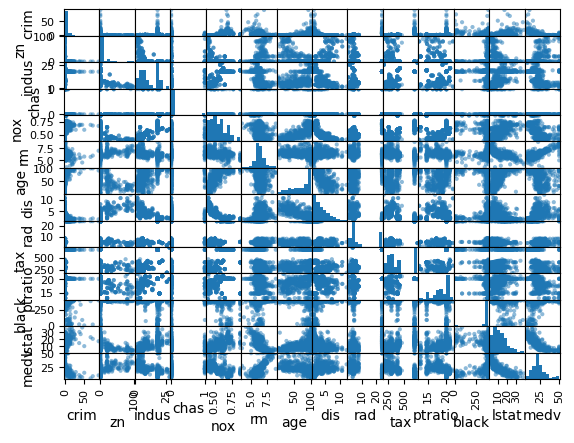

In [7]:
pd.plotting.scatter_matrix(Boston);


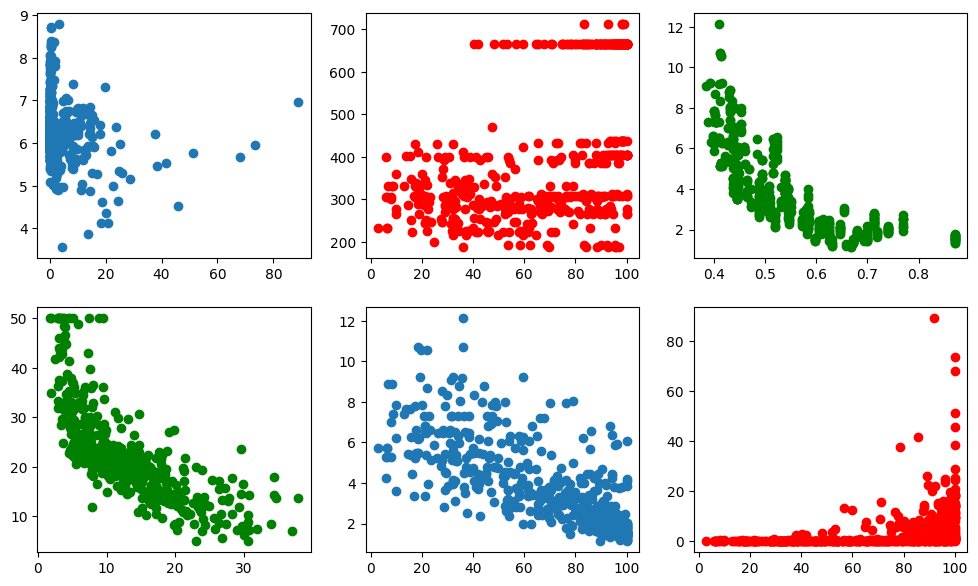

In [15]:

from matplotlib.pyplot import subplots


fig,axes=subplots(nrows=2, ncols=3, figsize=(12,7))
axes[0,0].plot(Boston["crim"],Boston["rm"], "o");
axes[0,1].scatter(Boston["age"],Boston["tax"],marker="o",color="red");
axes[0,2].scatter(Boston["nox"],Boston["dis"],marker="o",color="green");
axes[1,0].scatter(Boston["lstat"],Boston["medv"],marker="o",color="green");
axes[1,1].plot(Boston["age"],Boston["dis"], "o");
axes[1,2].scatter(Boston["age"],Boston["crim"],marker="o",color="red");

## 10c

1) Rooms vs Crimes, ingen tydlig trend, men de flesta brotten sker i medelstora hus.
2) Age vs Tax, ingen tydlig trend, men nya hus är aldrig högtaxerade
3) NOx vs Distance, som förväntat, stort avstånd till city ger låga luftföroreningar och vice versa
4) Lower status vs Median Value, omvänt proportionell som förväntat
5) Age vs Distance: Äldre hus byggdes nära city (som förväntat), nyare hus har större spridning
6) Age vs crime: De flesta brott sker i äldre hus (men de flesta äldre hus har få brott!)

## 10d

Crime vs Distance: Fler brott nära city
Crime vs Radial Highways: Fler brott nära motorvägarna
Crime vs Age: Fler brott i äldre hus (dåliga larmsystem eller rika människor?)

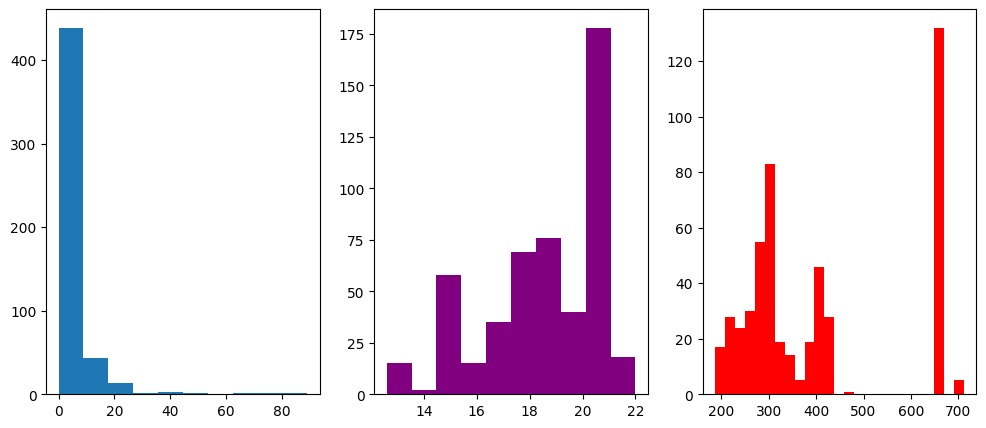

In [18]:
fig,axes=subplots(nrows=1, ncols=3, figsize=(12,5))
axes[0].hist(Boston["crim"]);
axes[1].hist(Boston["ptratio"], color="purple");
axes[2].hist(Boston["tax"], color="red", bins=25);

## 10e

- Några få har mycket brott, men de flesta har ganska få brott
- Elev/Lärare skiljer sig ganska mycket åt, från ca 12-22
- De flesta hus är taxerade mellan 200-450, därefter ett gap upp mot 700.


In [20]:
## 10f

Boston["chas"].value_counts()

# Svar: 35

chas
0    471
1     35
Name: count, dtype: int64

In [21]:
## 10g

np.median(Boston["ptratio"])

# Svar: 19.05

np.float64(19.05)

In [22]:
Boston_medv=Boston.sort_values("medv")
Boston_medv

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0


## 10h

398 och 405 har lägst medianvärde på husen.

Dessa områden har hög andel "lågklassinvånare", många elever per lärare, hög skatt, ligger nära motorväg, nära city, husen är gamla, mycket industri i närheten, hög andel brott. Ganska förväntat.

In [27]:
print(len(Boston[Boston['rm']>7]))
print(len(Boston[Boston['rm']>8]))

Boston_room=Boston.sort_values("rm")
Boston_room

64
13


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
406,20.71620,0.0,18.10,0,0.659,4.138,100.0,1.1781,24,666,20.2,370.22,23.34,11.9
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
262,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0


## 10i

64 områden har i genomsnitt mer än 7 rum
13 områden har i genomsnitt mer än 8 rum

Områdena med mer än 13 rum har få "lågklassinvånare", ligger långt från motorvägar, långt från city, har gamla hus, lite industri (skillnader finns) och få brott (skillnader finns).